In [319]:
# import libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import pickle

In [320]:
def euclidDistance(P1,P2):
    return np.linalg.norm(P1-P2,2)

In [321]:
def allDistances(X1, X2):
    D = np.zeros((X1.shape[0], X2.shape[0]))
    for idx1 in range(len(X1)):
        for idx2 in range(len(X2)):
            D[idx1,idx2] = euclidDistance(X1[idx1,:],X2[idx2,:])
    return D

In [322]:
# KNN Classifier

In [323]:
def kNNClassify(Xtr, Ytr, k, Xte, Te=1):

    n_train = Xtr.shape[0]
    n_test = Xte.shape[0]

    if any(np.abs(Ytr) != 1):
        print("The values of Ytr should be +1 or -1.")
        return -1

    if k > n_train:
        print("k is greater than the number of points, setting k=n_train")
        k = n_train

    Ypred = np.zeros(n_test)

    dist = allDistances(Xte, Xtr)

    for idx in range(n_test):
        if(Te==1): # test set
            neigh_indexes = np.argsort(dist[idx, :])[:k]
        else:
            neigh_indexes = np.argsort(dist[idx, :])[1:k+1]
            
        avg_neigh = np.mean(Ytr[neigh_indexes])
        Ypred[idx] = np.sign(avg_neigh)

    return Ypred

In [450]:
def kNNClassify2(Xtr, Ytr,  Xte):
    
    S = np.c_[Xtr,Ytr]
    n_test = Xte.shape[0]
        
    centre1 = np.zeros(S.shape[1])
    centre2 = np.zeros(S.shape[1])
    count1 = 0
    count2 = 0
    for i in range (0,S.shape[0]) :
        if S[i,6] == 1 :
            centre1 = centre1 + S[i,:]
            count1 = count1 + 1
        else :
            centre2 = centre2 + S[i,:]
            count2 = count2 + 1

    centre1 = centre1 / count1   
    centre2 = centre2 / count2
    
    Ypred = np.zeros(n_test)
    
    centre =  np.zeros(shape=(2,7))
    centre[0,:] = centre1
    centre[1,:] = centre2
    for j in range(n_test):
        dis1 = euclidDistance(centre1[0:6],Xte[j,:])
        dis2 = euclidDistance(centre2[0:6],Xte[j,:])
        if dis1 < dis2 :
            Ypred[j]=1
        else :
            Ypred[j]=-1

    return Ypred

In [453]:
Ypredtr1 = kNNClassify2(Xtr, Ytr, Xtr)

In [454]:
train_err_knn2 = knncalcError(Ypredtr1, Ytr)

In [455]:
# matrice de confision
import seaborn as sms
conf_mat = confusion_matrix(Ytr,Ypredtr1)
conf_mat

array([[ 86,  18],
       [ 20, 114]], dtype=int64)

In [457]:
Ypredtr2 = kNNClassify2(Xtr, Ytr, Xte)
train_err_knn_a = knncalcError(Ypredtr2, Ytr)
train_err_knn_a

C:\Users\USER\AppData\Local\Temp/ipykernel_12976/1563367278.py:2: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  return (np.count_nonzero(Ypred!=Ytrue))/len(Ytrue)


0.004201680672268907

In [459]:
# matrice de confision
import seaborn as sms
conf_mat = confusion_matrix(Yte,Ypredtr2)
conf_mat

array([[43,  4],
       [ 5, 50]], dtype=int64)

In [324]:
# SVM Classifier

In [325]:
def svmPredict(Xtr, Ytr, Xte, reg_parm = 0.1, epochs = 100000):
    
    n_train, d_train = np.shape(Xtr)
    
    if any(np.abs(Ytr) != 1):
        print("The values of Ytr should be +1 or -1.")
        return -1
    
    
    
    w = np.zeros(d_train)
    
    for epoch in range(1, epochs):
        learning_rate = 1/epoch        # variable learning rate
        for i, x in enumerate(Xtr):
            if (Ytr[i] * np.dot(Xtr[i], w)) < 1:
                w = (1 - learning_rate)*w + (learning_rate)*reg_parm*Ytr[i]*Xtr[i]
            else:
                w = (1 - learning_rate)*w
    
    Ypred = np.dot(Xte, w)
    
    return Ypred, w

In [326]:
# Data Generation

In [327]:
#read data
cell_df=pd.read_csv('TEST.csv')
cell_df.shape
cell_df.size
cell_df.count()
cell_df

cell_df.columns

feature_df = cell_df[['P_Duration','P_Amp','QRS_Duration','QRS_Amp','RR_Interval','PR_Interval']]

#Independent var
X = np.asarray(feature_df)
X.shape

#Dependent var
Y = np.asarray(cell_df['Etat'])
Y.shape


(340,)

In [519]:
cell_df

,P_Duration,P_Amp,QRS_Duration,QRS_Amp,RR_Interval,PR_Interval,Etat
0,130,0.145,160.0,1919.000,728,25,1
1,127,0.178,166.0,1.782,724,26,1
2,137,0.134,161.0,1.888,745,20,1
3,133,0.145,160.0,1.836,739,30,1
4,134,0.163,157.0,1.894,731,29,1
...,...,...,...,...,...,...,...
335,86,0.085,107.0,0.950,825,35,-1
336,77,0.063,120.0,1.560,700,58,-1
337,95,0.084,90.0,1.500,854,53,-1
338,93,0.079,106.0,1.200,871,47,-1


In [398]:
sample = cell_df[['P_Duration','P_Amp','QRS_Duration','QRS_Amp','RR_Interval','PR_Interval','Etat']]
S = np.asarray(sample)

7

In [ ]:
Sr ,Se = train_test_split(X, Y, test_size=0.3, random_state=4)

In [328]:
# Classification Error Calculation KNN

In [329]:
def knncalcError(Ypred, Ytrue):
    return (np.count_nonzero(Ypred!=Ytrue))/len(Ytrue)

In [330]:
# Classification Error Calculation SVM

In [331]:
def calcErrorSVM(Ypred, Ytrue):
    cnt = 0
    for i in range(len(Ytrue)):
        if Ypred[i]*Ytrue[i] <1 :
            cnt +=1
    return cnt/len(Ytrue)

In [332]:
#SVM Train-Test Error Analysis
def svmTrainTestAnalysis(Xtr, Ytr, Xte, Yte, reg_params):
    
    train_err = np.zeros(np.shape(reg_params))
    test_err = np.zeros(np.shape(reg_params))
    
    for i in range(len(reg_params)):
        Ypredt, w_train = svmPredict(Xtr, Ytr, Xtr, reg_params[i])
        train_err[i] = calcErrorSVM(Ypredt, Ytr)
        
        Ypredtr, w_pred = svmPredict(Xtr, Ytr, Xte, reg_params[i])
        test_err[i] = calcErrorSVM(Ypredtr, Yte)

    return train_err, test_err

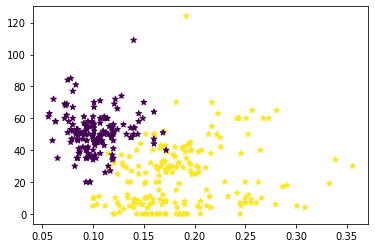

In [333]:
# split of data to be used as training
from sklearn.model_selection import train_test_split

Xtr, Xte, Ytr, Yte = train_test_split(X, Y, test_size=0.3, random_state=4)

reg_param = 1000
Y_pred, w = svmPredict(Xtr, Ytr, Xte, reg_param) 

# Visualization of the model

plt.scatter(np.array(X[:,1]), np.array(X[:,5]),marker='*',c=Y)

# Create the hyperplane

a = -w[1] / w[5]
xx = np.linspace(0,0.4)
yy = a * xx

# Plot the hyperplane
#plt.plot(xx, yy, color='red')

# Plot support vectors 
#plt.plot(xx, (yy+1), linestyle='--', color='blue')
#plt.plot(xx, (yy-1), linestyle='--', color='blue')

plt.show();

In [521]:
Xte.shape

(102, 6)

<AxesSubplot:xlabel='RR_Interval', ylabel='P_Amp'>

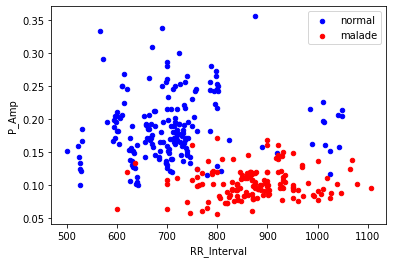

In [460]:
# view data
normal_df=cell_df[cell_df['Etat']==1][0:]
malade_df=cell_df[cell_df['Etat']==-1][0:]

axes=normal_df.plot(kind='scatter',x='RR_Interval',y='P_Amp',color='blue',label='normal')
malade_df.plot(kind='scatter',x='RR_Interval',y='P_Amp',color='red',label='malade',ax=axes)

In [334]:
w

array([ 149.15383316,   11.09431028,   43.33528178,   96.38984927,
        -20.36692204, -125.16920337])

In [472]:
Ypredt, w_train = svmPredict(Xtr, Ytr, Xtr, 0.1)
train_err8 = calcErrorSVM(Ypredt, Ytr)
Ypredtr, w_pred = svmPredict(Xtr, Ytr, Xte, 0.1)
test_err8 = calcErrorSVM(Ypredtr, Yte)

In [473]:
# matrice de confision
import seaborn as sms
from sklearn.metrics import confusion_matrix
y8=[]
for x in Ypredtr:
    if x > 0 :
        y8.append(1)
    else : 
        y8.append(-1)
conf_mat = confusion_matrix(Yte,y8)
conf_mat

array([[47,  0],
       [ 6, 49]], dtype=int64)

In [474]:
# matrice de confision
import seaborn as sms
from sklearn.metrics import confusion_matrix
y8r=[]
for x in Ypredt:
    if x > 0 :
        y8r.append(1)
    else : 
        y8r.append(-1)
conf_mat = confusion_matrix(Ytr,y8r)
conf_mat

array([[ 96,   8],
       [ 25, 109]], dtype=int64)

In [335]:
Ypredt, w_train = svmPredict(Xtr, Ytr, Xtr, 40)
train_err1 = calcErrorSVM(Ypredt, Ytr)

In [336]:
train_err1

0.12605042016806722

In [337]:
Ypredtr, w_pred = svmPredict(Xtr, Ytr, Xte, 40)
test_err1 = calcErrorSVM(Ypredtr, Yte)

In [338]:
test_err1 

0.06862745098039216

In [339]:
# matrice de confision
import seaborn as sms
from sklearn.metrics import confusion_matrix
y1=[]
for x in Ypredtr:
    if x > 0 :
        y1.append(1)
    else : 
        y1.append(-1)


In [340]:
conf_mat = confusion_matrix(Yte,y1)

In [341]:
conf_mat

array([[46,  1],
       [ 6, 49]], dtype=int64)

In [342]:
# matrice de confision
import seaborn as sms
from sklearn.metrics import confusion_matrix
yr=[]
for x in Ypredt:
    if x > 0 :
        yr.append(1)
    else : 
        yr.append(-1)
conf_mat = confusion_matrix(Ytr,yr)
conf_mat

array([[ 94,  10],
       [ 20, 114]], dtype=int64)

In [462]:
Ypredt, w_train = svmPredict(Xtr, Ytr, Xtr, 100)
train_err2 = calcErrorSVM(Ypredt, Ytr)
Ypredtr, w_pred = svmPredict(Xtr, Ytr, Xte, 100)
test_err2 = calcErrorSVM(Ypredtr, Yte)

In [463]:
train_err2

0.1134453781512605

In [464]:
test_err2

0.058823529411764705

In [465]:
# matrice de confision
import seaborn as sms
from sklearn.metrics import confusion_matrix
y2=[]
for x in Ypredtr:
    if x > 0 :
        y2.append(1)
    else : 
        y2.append(-1)
conf_mat = confusion_matrix(Yte,y2)
conf_mat

array([[46,  1],
       [ 5, 50]], dtype=int64)

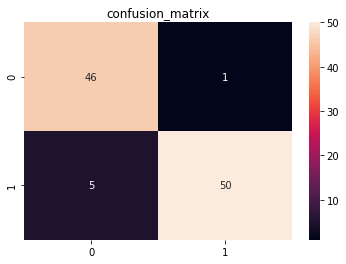

In [466]:
import seaborn as sms
sms.heatmap(conf_mat, annot=True)
plt.xlabel=("Predicted Label")
plt.ylabel=("True Label")
plt.title('confusion_matrix')
plt.show()

In [467]:
# matrice de confision
import seaborn as sms
from sklearn.metrics import confusion_matrix
yr2=[]
for x in Ypredt:
    if x > 0 :
        yr2.append(1)
    else : 
        yr2.append(-1)
conf_mat = confusion_matrix(Ytr,yr2)
conf_mat

array([[ 92,  12],
       [ 15, 119]], dtype=int64)

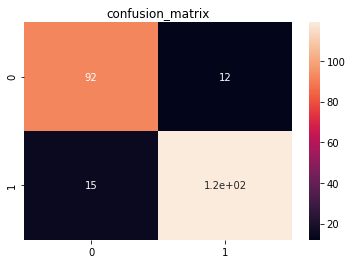

In [468]:
import seaborn as sms
sms.heatmap(conf_mat, annot=True)
plt.xlabel=("Predicted Label")
plt.ylabel=("True Label")
plt.title('confusion_matrix')
plt.show()

In [348]:
Ypredt, w_train = svmPredict(Xtr, Ytr, Xtr, 1000)
train_err3 = calcErrorSVM(Ypredt, Ytr)
Ypredtr, w_pred = svmPredict(Xtr, Ytr, Xte, 1000)
test_err3 = calcErrorSVM(Ypredtr, Yte)

In [349]:
train_err3

0.13445378151260504

In [350]:
test_err3

0.06862745098039216

In [351]:
# matrice de confision
import seaborn as sms
from sklearn.metrics import confusion_matrix
y3=[]
for x in Ypredtr:
    if x > 0 :
        y3.append(1)
    else : 
        y3.append(-1)
conf_mat = confusion_matrix(Yte,y3)
conf_mat

array([[46,  1],
       [ 6, 49]], dtype=int64)

In [ ]:
import seaborn as sms
sms.heatmap(conf_mat, annot=True)
plt.xlabel=("Predicted Label")
plt.ylabel=("True Label")
plt.title('confusion_matrix')
plt.show()

In [352]:
# matrice de confision
import seaborn as sms
from sklearn.metrics import confusion_matrix
yr3=[]
for x in Ypredt:
    if x > 0 :
        yr3.append(1)
    else : 
        yr3.append(-1)
conf_mat = confusion_matrix(Ytr,yr3)
conf_mat

array([[ 94,  10],
       [ 22, 112]], dtype=int64)

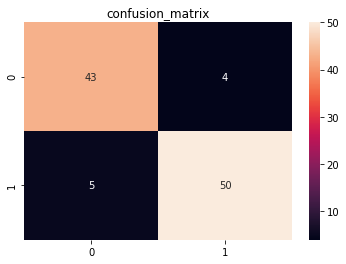

In [461]:
import seaborn as sms
sms.heatmap(conf_mat, annot=True)
plt.xlabel=("Predicted Label")
plt.ylabel=("True Label")
plt.title('confusion_matrix')
plt.show()

In [353]:
Ypredt, w_train = svmPredict(Xtr, Ytr, Xtr, 10000)
train_err4 = calcErrorSVM(Ypredt, Ytr)
Ypredtr, w_pred = svmPredict(Xtr, Ytr, Xte, 10000)
test_err4 = calcErrorSVM(Ypredtr, Yte)

In [354]:
train_err4

0.13025210084033614

In [355]:
test_err4

0.06862745098039216

In [356]:
# matrice de confision
import seaborn as sms
from sklearn.metrics import confusion_matrix
yr4=[]
for x in Ypredt:
    if x > 0 :
        yr4.append(1)
    else : 
        yr4.append(-1)
conf_mat = confusion_matrix(Ytr,yr4)
conf_mat

array([[ 94,  10],
       [ 21, 113]], dtype=int64)

In [357]:
# matrice de confision
import seaborn as sms
from sklearn.metrics import confusion_matrix
y4=[]
for x in Ypredtr:
    if x > 0 :
        y4.append(1)
    else : 
        y4.append(-1)
conf_mat = confusion_matrix(Yte,y4)
conf_mat

array([[46,  1],
       [ 6, 49]], dtype=int64)

In [358]:
Ypredt, w_train = svmPredict(Xtr, Ytr, Xtr,70)
train_err5 = calcErrorSVM(Ypredt, Ytr)
Ypredtr, w_pred = svmPredict(Xtr, Ytr, Xte, 70)
test_err5 = calcErrorSVM(Ypredtr, Yte)

In [359]:
train_err5

0.13865546218487396

In [360]:
test_err5

0.0784313725490196

In [361]:
# matrice de confision
import seaborn as sms
from sklearn.metrics import confusion_matrix
yr5=[]
for x in Ypredt:
    if x > 0 :
        yr5.append(1)
    else : 
        yr5.append(-1)
conf_mat = confusion_matrix(Ytr,yr5)
conf_mat

array([[ 83,  21],
       [ 12, 122]], dtype=int64)

In [362]:
# matrice de confision
import seaborn as sms
from sklearn.metrics import confusion_matrix
y5=[]
for x in Ypredtr:
    if x > 0 :
        y5.append(1)
    else : 
        y5.append(-1)
conf_mat = confusion_matrix(Yte,y5)
conf_mat

array([[44,  3],
       [ 5, 50]], dtype=int64)

In [496]:
Ypredtr = kNNClassify(Xtr, Ytr, 1, Xtr)
train_err1_knn1 = knncalcError(Ypredtr, Ytr)

Ypredte = kNNClassify(Xtr, Ytr, 1, Xte)
test_err_knn1 = knncalcError(Ypredte, Yte)

In [497]:
train_err1_knn1

0.0

In [498]:
test_err_knn1

0.0392156862745098

In [499]:
# matrice de confision
import seaborn as sms
conf_mat = confusion_matrix(Yte,Ypredte)
conf_mat

array([[46,  1],
       [ 3, 52]], dtype=int64)

In [500]:
# matrice de confision
import seaborn as sms
conf_mat = confusion_matrix(Ytr,Ypredtr)
conf_mat

array([[104,   0],
       [  0, 134]], dtype=int64)

In [368]:
#Let's check the trainig and validation error for Order of the Regularization Parameters
import timeit

reg_params = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000]
train_errors = np.zeros(len(reg_params))
validation_errors = np.zeros(len(reg_params))

start_time = timeit.default_timer()

train_errors, validation_errors = svmTrainTestAnalysis(Xtr, Ytr, Xte, Yte, reg_params)
    
end_time = timeit.default_timer()

print('Time taken to complete process:', end_time - start_time)

Time taken to complete process: 2996.9725602999097


In [369]:
print(train_errors)

[0.81512605 0.49579832 0.27731092 0.22268908 0.11764706 0.11344538
 0.13445378 0.1302521  0.11344538 0.13445378 0.13445378]


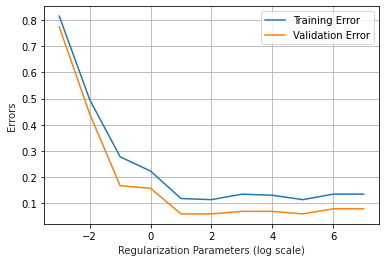

In [370]:
plt.plot(np.log10(np.array(reg_params)), np.array(train_errors), label='Training Error')
plt.plot(np.log10(np.array(reg_params)), np.array(validation_errors), label='Validation Error')
plt.xlabel('Regularization Parameters (log scale)', color='#1C2833')
plt.ylabel('Errors', color='#1C2833')
plt.legend(loc='upper right')
plt.grid()
plt.show()

In [371]:
def knntrainTestAnalysis(Ks, Xtr, Ytr, Xte, Yte):

    train_err = np.zeros(np.shape(Ks))
    test_err = np.zeros(np.shape(Ks))

    kpos = 0
    for kpos in range(len(Ks)):
        Ypredte = kNNClassify(Xtr, Ytr, Ks[kpos], Xte)
        test_err[kpos] = knncalcError(Ypredte, Yte)
        
        Ypredtr = kNNClassify(Xtr, Ytr, Ks[kpos], Xtr)
        train_err[kpos] = knncalcError(Ypredtr, Ytr)

    return train_err, test_err

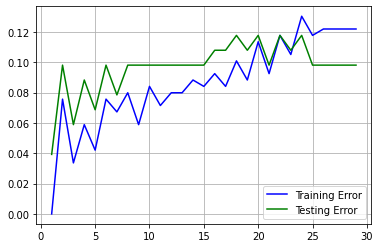

In [513]:
#Train-Test Analysis of the dataset using KNN
K  = list(range(1,30))
[training_error_knn,testing_error_knn] = knntrainTestAnalysis(K, Xtr, Ytr, Xte, Yte)
plt.plot(K, training_error_knn, 'b', label = 'Training Error')
plt.plot(K, testing_error_knn, 'g', label = 'Testing Error')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [373]:
def kFoldCrossValidationSVM(X,Y, num_of_folds, reg_param_list):
    
    if num_of_folds <= 0 and num_of_folds >= 100 and isinstance(num_of_folds_folds, int):
        print("select an integer in between 1 and 100")
        return -1
        
    size_of_input = X.shape[0]   
    size_of_validation = int(np.ceil(size_of_input/num_of_folds))
    
    num_reg_param = len(reg_param_list)
    reg_param_list = np.array(reg_param_list)
    
    
    T_mean, T_sd, V_mean, V_sd = np.zeros(num_reg_param),                                                  \
                                 np.zeros(num_reg_param),                                                  \
                                 np.zeros(num_reg_param),                                                  \
                                 np.zeros(num_reg_param)
        
    random_index = np.random.choice(size_of_input, size=size_of_input, replace=False)
    
    for reg_index, reg_param in enumerate(reg_param_list):
        first = 0
        for fold in range(num_of_folds):
            
            flags = np.zeros(size_of_input)
            flags[first:first+size_of_validation] = 1
            
            X_training, Y_training = X[flags == 0], Y[flags == 0]
            X_validation, Y_validation = X[flags == 1], Y[flags == 1]
            
            # training Error calculation
            Y_train_predict, w = svmPredict(X_training, Y_training, X_training, reg_param)
            training_error = calcErrorSVM(Y_train_predict, Y_training)
            
            T_mean[reg_index] += training_error
            T_sd[reg_index] += training_error**2
            
            # validation errorcalculation
            Y_validation_predict, w = svmPredict(X_training, Y_training, X_validation, reg_param)
            validation_error = calcErrorSVM(Y_validation_predict, Y_validation)
            
            V_mean[reg_index] += validation_error
            V_sd[reg_index] += validation_error**2
            
            first += size_of_validation
            
    T_mean = T_mean / num_of_folds 
    T_sd = T_sd / num_of_folds - T_mean**2
    
    V_mean = V_mean / num_of_folds 
    V_sd = V_sd - V_mean**2
    
    best_reg_param_index = np.argmin(V_mean)
    best_reg_param = reg_param_list[best_reg_param_index]
    
    return best_reg_param, T_mean, T_sd, V_mean, V_sd

In [374]:
def KFoldCVkNN(Xtr, Ytr, KF, k_list):

    if KF <= 0:
        print("Please supply a positive number of repetitions")
        return -1

    # Ensures that k_list is a numpy array
    k_list = np.array(k_list)
    num_k = k_list.size

    n_tot = Xtr.shape[0]
    n_val = int(np.ceil(n_tot/KF))

    Tm = np.zeros(num_k)
    Ts = np.zeros(num_k)
    Vm = np.zeros(num_k)
    Vs = np.zeros(num_k)

    # Random permutation of training data
    rand_idx = np.random.choice(n_tot, size=n_tot, replace=False)
    
    
    for kdx, k in enumerate(k_list):
        first = 0
        for fold in range(KF):
           
            flags = np.zeros(Xtr.shape[0])
            flags[first:first+n_val]=1;
            
            X = Xtr[flags==0]
            Y = Ytr[flags==0]
            X_val = Xtr[flags==1]
            Y_val = Ytr[flags==1]

            # Compute the training error of the kNN classifier for the given value of k
            trError = knncalcError(kNNClassify(X, Y, k, X), Y)
            Tm[kdx] += trError
            Ts[kdx] += trError ** 2

            # Compute the validation error of the kNN classifier for the given value of k
            valError = knncalcError(kNNClassify(X, Y, k, X_val), Y_val)
            Vm[kdx] += valError
            Vs[kdx] += valError ** 2
            
            first = first+n_val                

    Tm = Tm / len(Tm)
    Ts = Ts / len(Ts) - Tm ** 2

    Vm = Vm / len(Vm)
    Vs = Vs / len(Vs) - Vm ** 2

    best_k_idx = np.argmin(Vm)
    k = k_list[best_k_idx]

    return k, Vm, Vs, Tm, Ts

In [375]:
reg_param_range = [10, 40, 70, 100]
number_of_folds = 3
best_reg_param, T_mean, T_sd, V_mean, V_sd = kFoldCrossValidationSVM(X,Y, number_of_folds, reg_param_range)
print(best_reg_param, V_mean, V_sd)

100 [0.47076023 0.47076023 0.47368421 0.46491228] [0.92835402 0.92835402 0.93321022 0.91905202]


In [502]:
KF = 10
k_list = list(range(1, 20))
best_k, Vm_knn, Vs_knn, Tm_knn, Ts_knn = KFoldCVkNN(X, Y, KF, k_list)
print(best_k)
K = [best_k]
[training_error_knn, testing_error_knn] = knntrainTestAnalysis(K, Xtr, Ytr, Xte, Yte)
print('Validation Error for best K:', testing_error_knn)

5
Validation Error for best K: [0.06862745]


In [377]:
Ypredtr = kNNClassify(Xtr, Ytr, 5, Xtr)
train_err_knn2 = knncalcError(Ypredtr, Ytr)

Ypredte = kNNClassify(Xtr, Ytr, 5, Xte)
test_err_knn2 = knncalcError(Ypredte, Yte)

In [378]:
train_err_knn2

0.04201680672268908

In [379]:
test_err_knn2 

0.06862745098039216

In [380]:
# matrice de confision
import seaborn as sms
conf_mat = confusion_matrix(Yte,Ypredte)
conf_mat

array([[45,  2],
       [ 5, 50]], dtype=int64)

In [381]:
# matrice de confision
import seaborn as sms
conf_mat = confusion_matrix(Ytr,Ypredtr)
conf_mat

array([[100,   4],
       [  6, 128]], dtype=int64)

In [475]:
Ypredtr = kNNClassify(Xtr, Ytr, 15, Xtr)
train_err_knn2 = knncalcError(Ypredtr, Ytr)

Ypredte = kNNClassify(Xtr, Ytr, 15, Xte)
test_err_knn2 = knncalcError(Ypredte, Yte)

In [476]:
# matrice de confision
import seaborn as sms
conf_mat = confusion_matrix(Yte,Ypredte)
conf_mat

array([[43,  4],
       [ 6, 49]], dtype=int64)

In [477]:
# matrice de confision
import seaborn as sms
conf_mat = confusion_matrix(Ytr,Ypredtr)
conf_mat

array([[ 98,   6],
       [ 14, 120]], dtype=int64)

In [514]:
Ypredtr = kNNClassify(Xtr, Ytr, 5, Xtr)
train_err_knn2 = knncalcError(Ypredtr, Ytr)

Ypredte = kNNClassify(Xtr, Ytr, 5, Xte)
test_err_knn2 = knncalcError(Ypredte, Yte)

In [515]:
# matrice de confision
import seaborn as sms
conf_mat = confusion_matrix(Yte,Ypredte)
conf_mat

array([[45,  2],
       [ 5, 50]], dtype=int64)

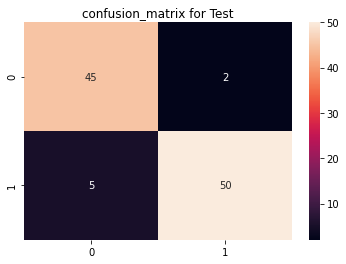

In [516]:
import seaborn as sms
sms.heatmap(conf_mat, annot=True)
plt.xlabel=("Predicted Label")
plt.ylabel=("True Label")
plt.title('confusion_matrix for Test')
plt.show()

In [517]:
# matrice de confision
import seaborn as sms
conf_mat = confusion_matrix(Ytr,Ypredtr)
conf_mat

array([[100,   4],
       [  6, 128]], dtype=int64)

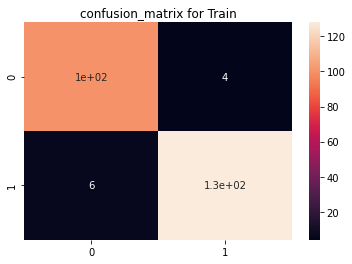

In [518]:
import seaborn as sms
sms.heatmap(conf_mat, annot=True)
plt.xlabel=("Predicted Label")
plt.ylabel=("True Label")
plt.title('confusion_matrix for Train')
plt.show()